In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

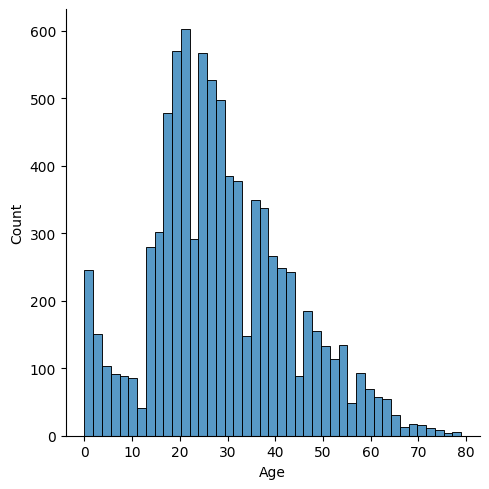

In [8]:
#Lets begin to fill the  null values in case of numerical data.
sns.displot(data['Age'])
plt.show()

In [9]:
data['Age'].mean()

28.82793046746535

In [17]:
#Since the data is not skewed we can use mean to fill in the missing data.
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [18]:
data['Age'].isnull().sum()

0

In [16]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [19]:
#Looking from the information table we can see the data is skewed so we will use mode value to fill null values for all parameters

In [21]:
data['RoomService'].fillna(data['RoomService'].mode()[0],inplace=True)
data['FoodCourt'].fillna(data['FoodCourt'].mode()[0],inplace=True)
data['ShoppingMall'].fillna(data['ShoppingMall'].mode()[0],inplace=True)
data['Spa'].fillna(data['Spa'].mode()[0],inplace=True)
data['VRDeck'].fillna(data['VRDeck'].mode()[0],inplace=True)


In [22]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
ls=LabelEncoder()
data['HomePlanet']=ls.fit_transform(data['HomePlanet'])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int32  
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int32(1), object(6)
memory usage: 857.5+ KB


In [39]:
data['HomePlanet'].value_counts()

0    4602
1    2131
2    1759
3     201
Name: HomePlanet, dtype: int64

In [40]:
data['CryoSleep']=ls.fit_transform(data['CryoSleep'])

In [42]:
data['CryoSleep'].value_counts()

0    5439
1    3037
2     217
Name: CryoSleep, dtype: int64

In [43]:
data['Destination']=ls.fit_transform(data['Destination'])
data['Destination'].value_counts()

2    5915
0    1800
1     796
3     182
Name: Destination, dtype: int64

In [44]:
data['VIP']=ls.fit_transform(data['VIP'])
data['VIP'].value_counts()

0    8291
2     203
1     199
Name: VIP, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int32  
 2   CryoSleep     8693 non-null   int32  
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   int32  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int32  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int32(4), object(3)
memory usage: 755.7+ KB


In [46]:
data['Cabin']=ls.fit_transform(data['Cabin'])

In [47]:
data['Cabin'].value_counts()

6560    199
6156      8
654       7
312       7
4695      7
       ... 
5892      1
1597      1
5876      1
5874      1
716       1
Name: Cabin, Length: 6561, dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int32  
 2   CryoSleep     8693 non-null   int32  
 3   Cabin         8693 non-null   int32  
 4   Destination   8693 non-null   int32  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int32  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int32(5), object(2)
memory usage: 721.7+ KB


C:\Users\Anant Tyagi\AppData\Local\Temp\ipykernel_34696\1152410390.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


<AxesSubplot: >

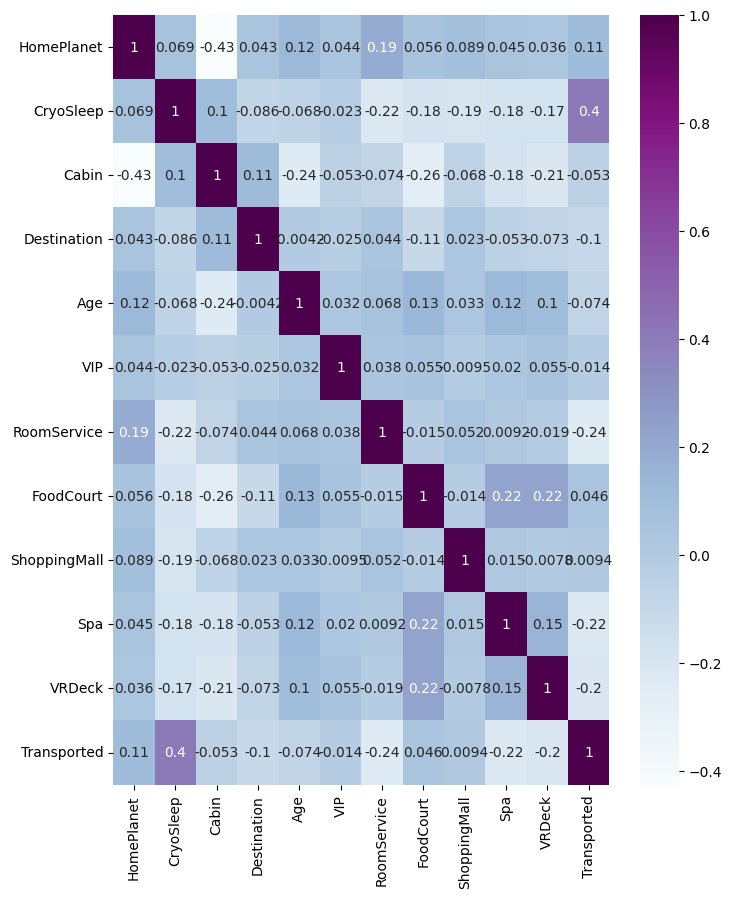

In [52]:
cor=data.corr()
f, ax = plt.subplots(figsize=(8,10))
sns.heatmap(cor, cmap='BuPu',annot=True)

In [58]:
#Dropping extra columns
X=data.drop(columns=['Name','PassengerId','Cabin','Transported'],axis=1)

In [57]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [60]:
data['Transported']=ls.fit_transform(data['Transported'])

In [61]:
Y=data['Transported']

In [63]:
print(Y)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rs=RandomForestClassifier(n_estimators=10)

In [67]:
rs.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [68]:
predict=rs.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predict,y_test))

0.7704691812327507


In [78]:
data_new=pd.read_csv('test.csv')

In [79]:
data_new.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [80]:
data_new=data_new.drop(columns=['Name','Cabin'],axis=1)

In [81]:
data_new.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [82]:
data_new['Age'].fillna(data_new['Age'].mean(),inplace=True)
data_new['RoomService'].fillna(data_new['RoomService'].mode()[0],inplace=True)
data_new['FoodCourt'].fillna(data_new['FoodCourt'].mode()[0],inplace=True)
data_new['ShoppingMall'].fillna(data_new['ShoppingMall'].mode()[0],inplace=True)
data_new['Spa'].fillna(data_new['Spa'].mode()[0],inplace=True)
data_new['VRDeck'].fillna(data_new['VRDeck'].mode()[0],inplace=True)


In [85]:
data_new.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

In [84]:
data_new['HomePlanet']=ls.fit_transform(data_new['HomePlanet'])

In [86]:
data_new['HomePlanet'].value_counts()

0    2263
1    1002
2     925
3      87
Name: HomePlanet, dtype: int64

In [87]:
data_new['CryoSleep']=ls.fit_transform(data_new['CryoSleep'])

data_new['Destination']=ls.fit_transform(data_new['Destination'])

data_new['VIP']=ls.fit_transform(data_new['VIP'])
data_new['VIP'].value_counts()

0    4110
2      93
1      74
Name: VIP, dtype: int64

In [88]:
data_new['Destination'].value_counts()

2    2956
0     841
1     388
3      92
Name: Destination, dtype: int64

In [89]:
data_new['CryoSleep'].value_counts()

0    2640
1    1544
2      93
Name: CryoSleep, dtype: int64

In [91]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   int32  
 2   CryoSleep     4277 non-null   int32  
 3   Destination   4277 non-null   int32  
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int32  
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
dtypes: float64(6), int32(4), object(1)
memory usage: 300.9+ KB


In [92]:
X_new=data_new.drop(columns=['PassengerId'],axis=1)

In [94]:
predict_new=rs.predict(X_new)

In [97]:
data_new['Transported']=predict_new

In [103]:
data_new.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0013_01,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0018_01,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,0
2,0019_01,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,1
3,0021_01,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,1
4,0023_01,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,0


In [108]:
data_new['Transported'].replace(0,False,inplace=True)
data_new['Transported'].replace(1,True,inplace=True)

In [109]:
data_new.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0013_01,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,True
1,0018_01,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,False
2,0019_01,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,True
3,0021_01,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,True
4,0023_01,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,False


In [111]:
pd.DataFrame(data_new,columns=['PassengerId','Transported']).to_csv('sub.csv')